# Visualization Functions for Human-LLM Programming Dialogue Analysis

## Overview
This notebook contains visualization functions for analyzing eye-tracking data and dialogue patterns in human-LLM programming interactions. The visualizations support the findings presented in "Mapping Cognitive Load in Human-LLM Programming Dialogues: A Multimodal Analysis of Technical Discourse Patterns" (ACL 2024).

## Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Key Visualizations

### 1. Complexity Heatmap
def plot_complexity_heatmap(data):
   
   Creates a heatmap showing normalized values of complexity scores 
   and eye movement rates across different themes.
   
   Parameters:
   - data: DataFrame containing theme, complexity scores, and eye-tracking metrics
   
   Returns:
   - matplotlib figure object
   

### 2. Cognitive Load Plot
def plot_cognitive_load(data):
   
   Generates a multi-panel plot showing fixation count, saccade count,
   and dwell time measurements across dialogue themes.
   
   Parameters:
   - data: DataFrame containing eye-tracking metrics by theme
   
   Returns:
   - matplotlib figure object
   

### 3. Experience Level Analysis
def plot_experience_patterns(data):
   
   Visualizes dialogue patterns and eye-tracking metrics across
   different experience levels.
   
   Parameters:
   - data: DataFrame containing experience levels and interaction metrics
   
   Returns:
   - matplotlib figure object
   

## Usage

### Data Requirements
- Eye-tracking metrics (fixation_count, saccade_count, dwell_time)
- Dialogue themes
- Experience levels
- Complexity scores

### Example Usage
# Load and prepare data
data = pd.read_csv('processed_data.csv')

# Generate visualizations
- complexity_fig = plot_complexity_heatmap(data)
- cognitive_load_fig = plot_cognitive_load(data)
- experience_fig = plot_experience_patterns(data)

# Save figures
- complexity_fig.savefig('complexity_heatmap.pdf')
- cognitive_load_fig.savefig('cognitive_load_plot.pdf')
- experience_fig.savefig('experience_patterns.pdf')

## Figure Specifications
All figures are generated following ACL formatting guidelines:
- Resolution: 300 DPI
- Font: Times New Roman
- Font sizes: 
 - Title: 12pt
 - Axis labels: 10pt
 - Tick labels: 8pt
- Figure dimensions optimized for single/double column layout

## Output
The visualizations are saved in both PDF and PNG formats:
- complexity_heatmap_{version}.pdf
- cognitive_load_plot_{version}.pdf
- experience_patterns_{version}.pdf

## Notes
- Color schemes chosen for colorblind accessibility
- All figures include error bars where applicable
- Interactive versions available in the notebook

In [1]:
# Import necessary libraries
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Set up visualization style
sns.set(style='whitegrid')

In [2]:
# Load dataset containing student prompts
file_path = '/Users/mts517/Desktop/NLP Analysis/Joined_Dataset.csv'  # Update with correct file path
data = pd.read_csv(file_path)
data.head()

,NetID,Exercise,Gender,Age,ACYear,Difficulty,DifficultyWTTools,DifficultyWTools,DifficultyWGPT,Confidence,...,Peak_velocity_avg_saccade,Peak_acceleration_avg_saccade,Peak_deceleration_avg_saccade,Direction_avg_saccade,Mouse_click_cnt,Student,AOI,Student_prompt,ChatGPT_answer,Interaction_Sequence
0,ae2195,1,1.0,21.0,4.0,3.0,3.0,5.0,5.0,4.0,...,102.56,4025.20,-4948.19,178.13,19.0,1.0,1.0,so want to write program to display the shape ...,Certainly! You can achieve this by using neste...,1
1,ae2195,1,1.0,21.0,4.0,3.0,3.0,5.0,5.0,4.0,...,96.70,3253.11,-3975.53,177.17,12.0,1.0,0.0,so want to write program to display the shape ...,Certainly! You can achieve this by using neste...,1
2,ae2195,1,1.0,21.0,4.0,3.0,3.0,5.0,5.0,4.0,...,102.56,4025.20,-4948.19,178.13,19.0,1.0,1.0,"great but here what am getting now, not excatl...","see, my apologies for the misunderstanding. He...",2
3,ae2195,1,1.0,21.0,4.0,3.0,3.0,5.0,5.0,4.0,...,96.70,3253.11,-3975.53,177.17,12.0,1.0,0.0,"great but here what am getting now, not excatl...","see, my apologies for the misunderstanding. He...",2
4,ae2195,1,1.0,21.0,4.0,3.0,3.0,5.0,5.0,4.0,...,102.56,4025.20,-4948.19,178.13,19.0,1.0,1.0,no want the second line to move one space afte...,"understand now. To achieve that, you can modif...",3



Theme Distribution:
                       count  percentage
Refined_theme                           
Output Formatting        150       33.78
Miscellaneous             85       19.14
Pattern Programming       73       16.44
Concept Clarification     30        6.76
Input Processing          21        4.73
Syntax                    20        4.50
Data Structures           20        4.50
String Manipulation       16        3.60
Debugging                 13        2.93
Mathematical              12        2.70
Logic Building             4        0.90

Theme Distribution by Academic Year:
Refined_theme  Concept Clarification  Data Structures  Debugging  \
ACYear                                                             
2.0                                4                6          6   
3.0                                0                0          0   
4.0                               26                4          2   
5.0                                0               10          4   


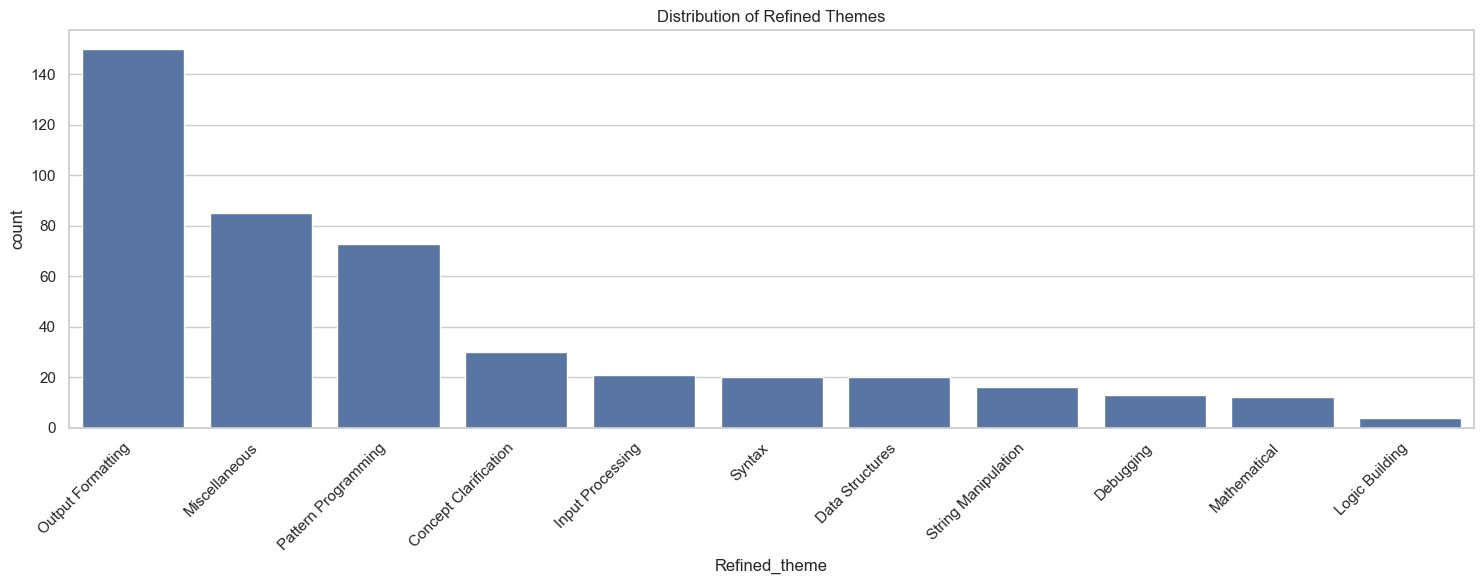

<Figure size 1500x800 with 0 Axes>

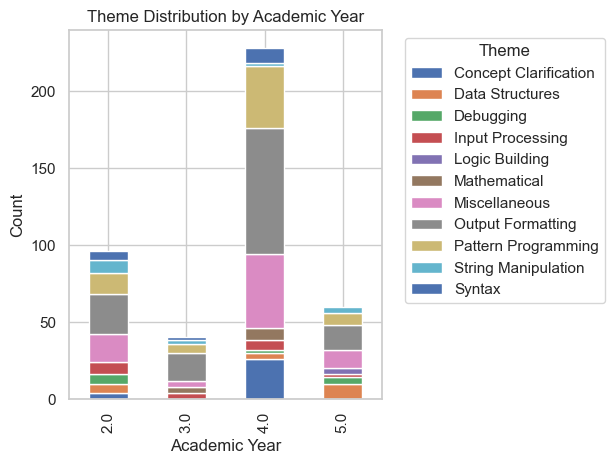

In [5]:
def create_refined_themes(data):
    """
    Refine theme categorization with more detailed subcategories
    """
    def identify_detailed_theme(row):
        prompt = str(row['Student_prompt']).lower()
        
        # Define subcategories with their keywords
        theme_keywords = {
            'Data Structures': ['array', 'list', 'stack', 'queue', 'tree', 'graph', 'dictionary', 'set'],
            'Algorithms': ['sort', 'search', 'algorithm', 'recursive', 'iteration'],
            'Syntax': ['syntax', 'variable', 'function', 'loop', 'condition', 'declare'],
            'Debugging': ['error', 'debug', 'fix', 'wrong', 'issue', 'problem'],
            'Pattern Programming': ['pattern', 'square', 'triangle', 'shape', 'print pattern', 'row', 'column', 
                                  'grid', 'matrix', 'paint', 'cells', 'white'],
            'Output Formatting': ['format', 'print', 'display', 'output', 'align', 'right', 'left', 'center',
                                'space', 'number format', 'decimal'],
            'Input Processing': ['input', 'read', 'parse', 'convert', 'validate', 'check input'],
            'Logic Building': ['logic', 'condition', 'if else', 'switch', 'case', 'boolean'],
            'String Manipulation': ['string', 'text', 'character', 'substring', 'concat', 'split'],
            'Mathematical': ['calculate', 'compute', 'sum', 'average', 'multiply', 'divide']
        }
        
        # Check for keywords in prompt
        matched_themes = []
        for theme, keywords in theme_keywords.items():
            if any(keyword in prompt for keyword in keywords):
                matched_themes.append(theme)
        
        # If multiple themes match, use additional context to determine primary theme
        if len(matched_themes) > 1:
            # Count keyword matches for each theme
            theme_scores = {}
            for theme in matched_themes:
                score = sum(1 for keyword in theme_keywords[theme] if keyword in prompt)
                theme_scores[theme] = score
            
            # Return theme with highest score
            return max(theme_scores.items(), key=lambda x: x[1])[0]
        
        # If one theme matches, return it
        elif len(matched_themes) == 1:
            return matched_themes[0]
        
        # If no predefined themes match, analyze content for categorization
        else:
            # Check for code modification patterns
            if any(word in prompt for word in ['modify', 'change', 'update', 'adjust']):
                return 'Code Modification'
            # Check for explanation requests
            elif any(word in prompt for word in ['explain', 'why', 'how', 'what', 'understand']):
                return 'Concept Clarification'
            # Check for optimization requests
            elif any(word in prompt for word in ['optimize', 'improve', 'better', 'faster']):
                return 'Optimization'
            else:
                return 'Miscellaneous'
    
    # Create new column with refined themes
    data['Refined_theme'] = data.apply(identify_detailed_theme, axis=1)
    
    # Calculate theme distribution
    theme_dist = data['Refined_theme'].value_counts()
    
    # Create transition matrix for refined themes
    transitions = pd.crosstab(
        data['Refined_theme'],
        data['Refined_theme'].shift(-1),
        normalize='index'
    )
    
    return {
        'data': data,
        'theme_distribution': theme_dist,
        'transitions': transitions
    }

def analyze_refined_themes(data_with_themes):
    """
    Analyze the refined theme categorization
    """
    # Basic distribution analysis
    theme_stats = pd.DataFrame({
        'count': data_with_themes['Refined_theme'].value_counts(),
        'percentage': data_with_themes['Refined_theme'].value_counts(normalize=True) * 100
    }).round(2)
    
    # Academic year analysis
    year_theme_dist = pd.crosstab(
        data_with_themes['ACYear'],
        data_with_themes['Refined_theme']
    )
    
    # Eye-tracking metrics by theme
    metrics = ['Fixation_count', 'Saccade_count', 'Dwell_time_gaze_ms']
    eye_tracking_stats = {}
    
    for metric in metrics:
        eye_tracking_stats[metric] = data_with_themes.groupby('Refined_theme')[metric].agg([
            'mean', 'std', 'count'
        ]).round(2)
    
    # Visualization of theme distribution
    plt.figure(figsize=(15, 6))
    sns.barplot(x=theme_stats.index, y='count', data=theme_stats)
    plt.xticks(rotation=45, ha='right')
    plt.title('Distribution of Refined Themes')
    plt.tight_layout()
    
    # Visualization of theme distribution by academic year
    plt.figure(figsize=(15, 8))
    year_theme_dist.plot(kind='bar', stacked=True)
    plt.title('Theme Distribution by Academic Year')
    plt.xlabel('Academic Year')
    plt.ylabel('Count')
    plt.legend(title='Theme', bbox_to_anchor=(1.05, 1))
    plt.tight_layout()
    
    return {
        'theme_stats': theme_stats,
        'year_theme_dist': year_theme_dist,
        'eye_tracking_stats': eye_tracking_stats
    }

# Execute the analysis
refined_results = create_refined_themes(data)
analysis_results = analyze_refined_themes(refined_results['data'])

# Display results
print("\nTheme Distribution:")
print(analysis_results['theme_stats'])
print("\nTheme Distribution by Academic Year:")
print(analysis_results['year_theme_dist'])
print("\nEye-tracking Metrics by Theme:")
for metric, stats in analysis_results['eye_tracking_stats'].items():
    print(f"\n{metric}:")
    print(stats)

In [7]:
import pandas as pd
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import numpy as np

# 1. Analysis of Variance (ANOVA) for eye-tracking metrics across themes
def analyze_eye_tracking_metrics(data):
    metrics = ['Fixation_count', 'Saccade_count', 'Dwell_time_gaze_ms']
    results = {}
    
    for metric in metrics:
        # One-way ANOVA
        themes = data.groupby('Prompt_theme')[metric].apply(list)
        f_stat, p_val = stats.f_oneway(*themes)
        
        # Tukey's HSD post-hoc test
        tukey = pairwise_tukeyhsd(data[metric], data['Prompt_theme'])
        
        results[metric] = {
            'f_statistic': f_stat,
            'p_value': p_val,
            'tukey_results': tukey
        }
    
    return results

# 2. Chi-square test for theme distribution across academic years
def analyze_theme_distribution(data):
    contingency_table = pd.crosstab(data['ACYear'], data['Prompt_theme'])
    chi2, p_val, dof, expected = stats.chi2_contingency(contingency_table)
    
    return {
        'chi2_statistic': chi2,
        'p_value': p_val,
        'degrees_of_freedom': dof,
        'contingency_table': contingency_table
    }

# 3. Markov Chain Analysis for theme transitions
def analyze_theme_transitions(data):
    # Create transition matrix
    transitions = data.groupby('Prompt_theme')['Prompt_theme'].shift(-1).fillna('End')
    transition_matrix = pd.crosstab(
        data['Prompt_theme'], 
        transitions, 
        normalize='index'
    )
    
    # Calculate entropy for each theme's transitions
    entropy = -np.sum(
        transition_matrix * np.log2(transition_matrix + 1e-10), 
        axis=1
    )
    
    return {
        'transition_matrix': transition_matrix,
        'transition_entropy': entropy
    }

# 4. Gender-based analysis using Mann-Whitney U test
def analyze_gender_differences(data):
    metrics = ['Fixation_count', 'Saccade_count', 'Dwell_time_gaze_ms']
    results = {}
    
    for metric in metrics:
        male_data = data[data['Gender'] == 1][metric]
        female_data = data[data['Gender'] == 2][metric]
        
        stat, p_val = stats.mannwhitneyu(male_data, female_data, alternative='two-sided')
        
        results[metric] = {
            'statistic': stat,
            'p_value': p_val,
            'male_median': male_data.median(),
            'female_median': female_data.median()
        }
    
    return results

# Execute all analyses
def run_comprehensive_analysis(data):
    return {
        'eye_tracking_analysis': analyze_eye_tracking_metrics(data),
        'theme_distribution': analyze_theme_distribution(data),
        'theme_transitions': analyze_theme_transitions(data),
        'gender_analysis': analyze_gender_differences(data)
    }

In [11]:
def perform_advanced_analysis(data):
    """
    Perform advanced statistical analyses on refined themes
    """
    from scipy import stats
    import numpy as np
    
    # 1. One-way ANOVA for eye-tracking metrics across themes
    metrics = ['Fixation_count', 'Saccade_count', 'Dwell_time_gaze_ms']
    anova_results = {}
    
    for metric in metrics:
        # Prepare groups for ANOVA
        groups = [group for name, group in data.groupby('Refined_theme')[metric] if len(group) > 1]
        if len(groups) > 1:
            f_stat, p_val = stats.f_oneway(*groups)
            anova_results[metric] = {'f_statistic': f_stat, 'p_value': p_val}
    
    # 2. Chi-square test for theme distribution across years
    contingency = pd.crosstab(data['ACYear'], data['Refined_theme'])
    chi2, p_val, dof, expected = stats.chi2_contingency(contingency)
    
    # 3. Calculate complexity scores based on eye-tracking metrics
    # Normalize each metric
    data['normalized_fixation'] = data['Fixation_count'] / data['Fixation_count'].mean()
    data['normalized_saccade'] = data['Saccade_count'] / data['Saccade_count'].mean()
    data['normalized_dwell'] = data['Dwell_time_gaze_ms'] / data['Dwell_time_gaze_ms'].mean()
    
    # Calculate complexity score
    data['complexity_score'] = (data['normalized_fixation'] + 
                              data['normalized_saccade'] + 
                              data['normalized_dwell']) / 3
    
    complexity_by_theme = data.groupby('Refined_theme')['complexity_score'].agg([
        'mean', 'std', 'count'
    ]).round(3)
    
    # 4. Sequence analysis
    data['seq_num'] = data.groupby(['NetID', 'Exercise']).cumcount() + 1
    sequence_patterns = pd.crosstab([data['seq_num']], data['Refined_theme'])
    sequence_proportions = sequence_patterns.div(sequence_patterns.sum(axis=1), axis=0)
    
    return {
        'anova_results': anova_results,
        'theme_distribution_chi2': {
            'statistic': chi2,
            'p_value': p_val,
            'dof': dof
        },
        'complexity_scores': complexity_by_theme,
        'sequence_patterns': sequence_proportions
    }

def visualize_advanced_analysis(data, results):

# Run the analyses and display results
results = perform_advanced_analysis(data)
visualize_advanced_analysis(data, results)

# Display statistical results
print("\nANOVA Results for Eye-tracking Metrics:")
for metric, res in results['anova_results'].items():
    print(f"\n{metric}:")
    print(f"F-statistic: {res['f_statistic']:.3f}")
    print(f"p-value: {res['p_value']:.4f}")

print("\nTheme Distribution Chi-square Test:")
print(f"Chi-square statistic: {results['theme_distribution_chi2']['statistic']:.3f}")


print("\nComplexity Scores by Theme:")
print(results['complexity_scores'])


ANOVA Results for Eye-tracking Metrics:

Fixation_count:
F-statistic: nan
p-value: nan

Saccade_count:
F-statistic: nan
p-value: nan

Dwell_time_gaze_ms:
F-statistic: nan
p-value: nan

Theme Distribution Chi-square Test:
Chi-square statistic: 116.324

Complexity Scores by Theme:
                        mean    std  count
Refined_theme                             
Concept Clarification  1.200  0.670     30
Data Structures        1.413  1.212     20
Debugging              1.390  1.251     12
Input Processing       0.931  0.860     20
Logic Building         1.907  1.437      4
Mathematical           0.686  0.504     12
Miscellaneous          1.086  0.860     82
Output Formatting      0.864  0.616    142
Pattern Programming    0.969  0.825     68
String Manipulation    0.921  0.731     16
Syntax                 0.906  0.575     18


/var/folders/zx/v9bf_v8n391gt783_nnz0qdr0000gp/T/ipykernel_88497/1631481540.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g-" (-> color='g'). The keyword argument will take precedence.
  dwell_line = ax2.plot(x, dwell_scaled, 'g-',
/var/folders/zx/v9bf_v8n391gt783_nnz0qdr0000gp/T/ipykernel_88497/1631481540.py:76: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels([f'{y/scale_factor:.0f}' for y in yticks])


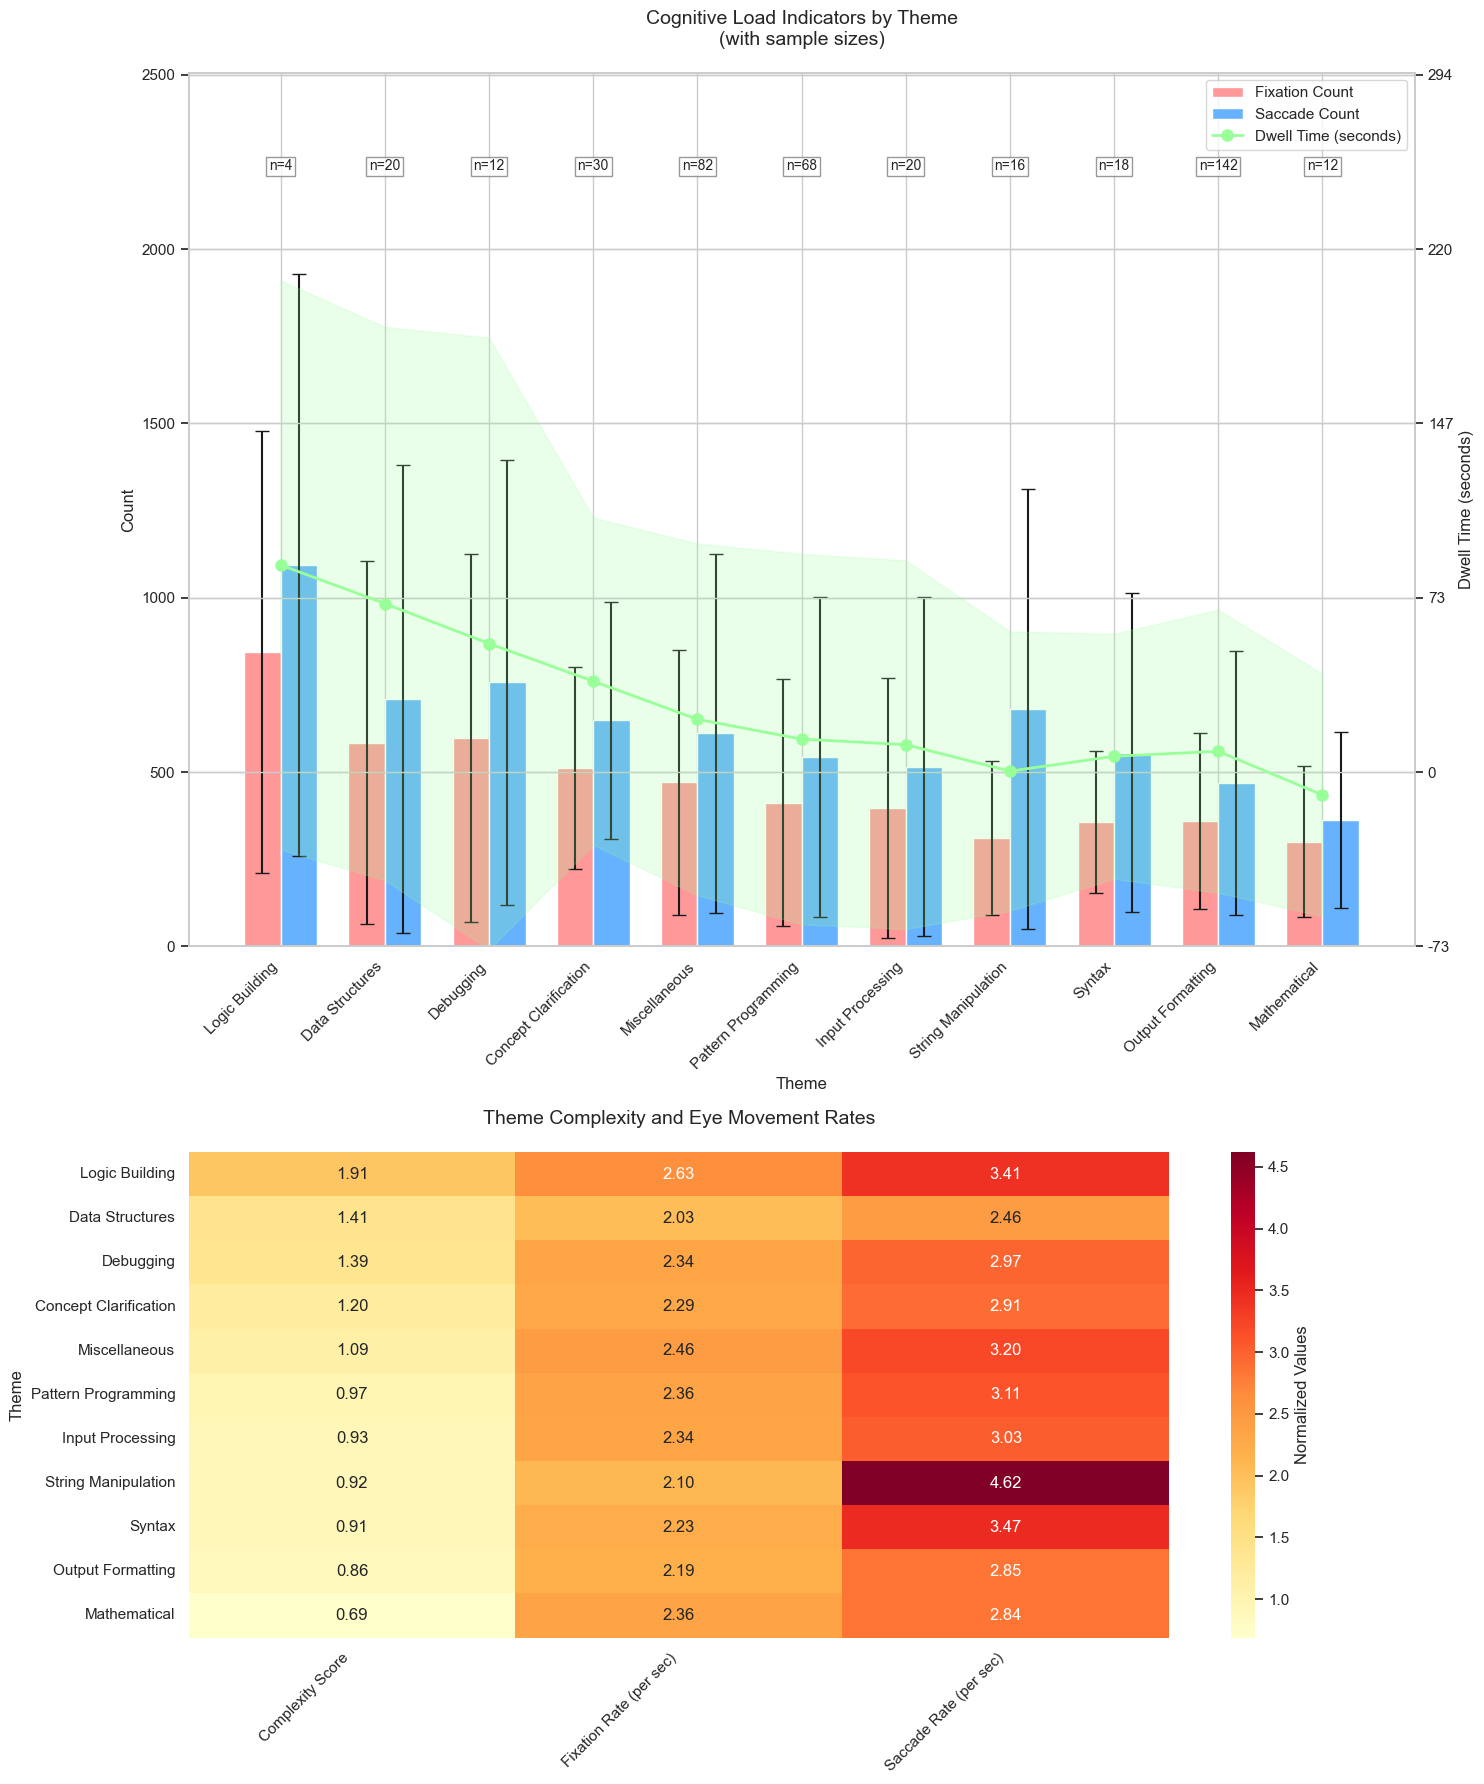

In [12]:
def create_scale_adjusted_analysis(data):
    # Calculate metrics
    theme_metrics = data.groupby('Refined_theme').agg({
        'Fixation_count': ['mean', 'std', 'count'],
        'Saccade_count': ['mean', 'std'],
        'Dwell_time_gaze_ms': ['mean', 'std'],
        'complexity_score': 'mean'
    }).round(2)
    
    # Reset column names
    theme_metrics.columns = ['Fixation_mean', 'Fixation_std', 'Sample_size', 
                           'Saccade_mean', 'Saccade_std',
                           'Dwell_mean', 'Dwell_std', 'Complexity']
    
    # Sort by complexity score
    theme_metrics = theme_metrics.sort_values('Complexity', ascending=False)
    
    # Create figure with increased height
    fig = plt.figure(figsize=(15, 18))
    gs = fig.add_gridspec(2, 1, height_ratios=[1.8, 1])
    
    # 1. Combined Cognitive Load Indicators with sample size
    ax1 = fig.add_subplot(gs[0])
    ax2 = ax1.twinx()  # Create second y-axis
    
    # Plot counts on left axis
    width = 0.35
    x = np.arange(len(theme_metrics.index))
    rects1 = ax1.bar(x - width/2, theme_metrics['Fixation_mean'], width, 
                     label='Fixation Count', color='#FF9999',
                     yerr=theme_metrics['Fixation_std'], capsize=5)
    rects2 = ax1.bar(x + width/2, theme_metrics['Saccade_mean'], width,
                     label='Saccade Count', color='#66B2FF',
                     yerr=theme_metrics['Saccade_std'], capsize=5)
    
    # Convert dwell time to seconds and plot on right axis
    dwell_seconds = theme_metrics['Dwell_mean']/1000
    dwell_std_seconds = theme_metrics['Dwell_std']/1000
    
    # Scale factor to align the axes
    scale_factor = max(theme_metrics['Fixation_mean'].max(), 
                      theme_metrics['Saccade_mean'].max()) / dwell_seconds.max()
    
    dwell_scaled = dwell_seconds * scale_factor
    dwell_std_scaled = dwell_std_seconds * scale_factor
    
    dwell_line = ax2.plot(x, dwell_scaled, 'g-', 
                         label='Dwell Time (seconds)', linewidth=2, 
                         marker='o', markersize=8, color='#99FF99')
    ax2.fill_between(x, 
                     dwell_scaled - dwell_std_scaled,
                     dwell_scaled + dwell_std_scaled,
                     color='#99FF99', alpha=0.2)
    
    # Calculate maximum height including error bars
    max_height = max(
        max(theme_metrics['Fixation_mean'] + theme_metrics['Fixation_std']),
        max(theme_metrics['Saccade_mean'] + theme_metrics['Saccade_std'])
    )
    
    # Add sample size annotations with good spacing from the top
    for i, sample_size in enumerate(theme_metrics['Sample_size']):
        ax1.text(i, max_height * 1.15, f'n={int(sample_size)}', 
                ha='center', va='bottom', fontsize=10,
                bbox=dict(facecolor='white', edgecolor='gray', alpha=0.8, pad=2))
    
    # Customize first axis (counts)
    ax1.set_xlabel('Theme', fontsize=12)
    ax1.set_ylabel('Count', fontsize=12)
    ax1.set_title('Cognitive Load Indicators by Theme\n(with sample sizes)', pad=20, fontsize=14)
    
    # Customize second axis (dwell time)
    # Convert the scaled ticks back to actual seconds
    ax2.set_ylabel('Dwell Time (seconds)', fontsize=12)
    yticks = ax2.get_yticks()
    ax2.set_yticklabels([f'{y/scale_factor:.0f}' for y in yticks])
    
    # Set x-ticks
    ax1.set_xticks(x)
    ax1.set_xticklabels(theme_metrics.index, rotation=45, ha='right')
    
    # Add legend
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, 
              loc='upper right', bbox_to_anchor=(1.0, 1.0))
    
    # Adjust y-axis limit to accommodate everything
    ax1.set_ylim(0, max_height * 1.3)
    ax2.set_ylim(0, max_height * 1.3)
    
    # 2. Eye Movement Rates Heatmap
    ax3 = fig.add_subplot(gs[1])
    # Calculate rates in seconds
    fixation_rate = (theme_metrics['Fixation_mean'] / (theme_metrics['Dwell_mean'] / 1000)).round(2)
    saccade_rate = (theme_metrics['Saccade_mean'] / (theme_metrics['Dwell_mean'] / 1000)).round(2)
    
    complexity_data = pd.DataFrame({
        'Theme': theme_metrics.index,
        'Complexity Score': theme_metrics['Complexity'],
        'Fixation Rate (per sec)': fixation_rate,
        'Saccade Rate (per sec)': saccade_rate
    })
    
    complexity_matrix = complexity_data.set_index('Theme')
    sns.heatmap(complexity_matrix,
                cmap='YlOrRd',
                annot=True,
                fmt='.2f',
                cbar_kws={'label': 'Normalized Values'},
                ax=ax3)
    ax3.set_title('Theme Complexity and Eye Movement Rates', pad=20, fontsize=14)
    ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha='right')
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

# Generate the scale-adjusted visualization
create_scale_adjusted_analysis(data)